SVM MODEL

In [3]:
import pandas as pd
from sklearn.preprocessing import normalize, StandardScaler

df = pd.read_csv('processed_creditcard.csv')

# Scale features from V1 to Amount (columns 1 to 29)
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

data_matrix = df.values

X = data_matrix[:, 1:30]
y = data_matrix[:, 30].astype(int)  # Convert labels to int


# Normalize features per sample
X = normalize(X, norm="l1")

DATA SET TRAINING AND TESTING

In [4]:
#test and train split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

BUILD THE SVM MODEL

In [5]:
#building the model
from sklearn.svm import LinearSVC
SVM = LinearSVC(class_weight='balanced',random_state=42)
SVM.fit(X_train,y_train)

LinearSVC(class_weight='balanced', random_state=42)

In [7]:
#finding the probalities
y_predSVM = SVM.decision_function(X_test)

FING THE ACCURCY

AUC: 0.987


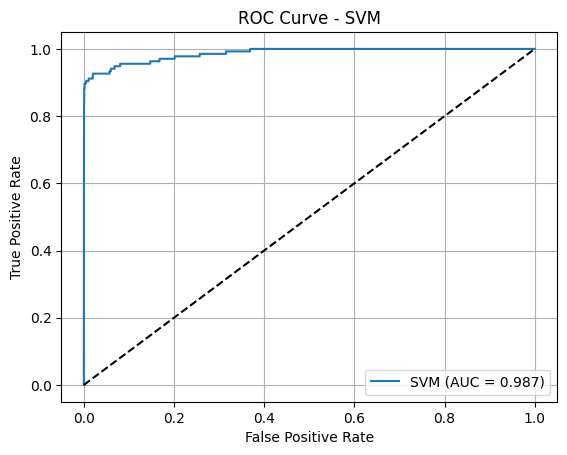

In [10]:
#checking the accurancy
from sklearn.metrics import roc_auc_score,roc_curve

Auc = roc_auc_score(y_test,y_predSVM)
print("AUC: {0:.03f}".format(Auc))


#plot the model
fpr, tpr, _ = roc_curve(y_test, y_predSVM)

# Plot ROC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"SVM (AUC = {Auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
plt.show()
